In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
pd.set_option('display.max_columns', 500)

# Super Hero Info Data

In [2]:
# Read data in
superhero_info = pd.read_csv("Data/superhero_info - superhero_info.csv")
superhero_powers = pd.read_csv("Data/superhero_powers - superhero_powers.csv")

In [3]:
# Display Super Hero Data
superhero_info.info()
superhero_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [4]:
superhero_info['Hero|Publisher'].str.split('|', expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [5]:
# Split Hero|Publisher into two sperate columns Hero and Publisher
superhero_info[['Hero', 'Publisher']] = superhero_info['Hero|Publisher'].str.split('|', expand=True)
superhero_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
superhero_info = superhero_info.drop(columns=['Hero|Publisher'])
superhero_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
# Make Measurement Column into two columns. Height and Weight
## Examining a single value from the Measurements col
measure = superhero_info.loc[0,"Measurements"]
print(type(measure))
measure

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [8]:
measure = measure.replace("'",'"')
measure

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [9]:
correct_measure = json.loads(measure)
print(type(correct_measure))
correct_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [10]:
## Use .str.replace to replace all single quotes
superhero_info['Measurements'] = superhero_info['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
superhero_info['Measurements'] = superhero_info['Measurements'].apply(json.loads)
superhero_info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [11]:
## Check a single value after transformation
test_measure = superhero_info.loc[0, 'Measurements']
print(type(test_measure))
test_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [12]:
# Make the two columns Height and Weight 
ht_wt = superhero_info['Measurements'].apply(pd.Series)
ht_wt

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [13]:
# Join ht_wt with superhero_info dataframe
superhero_info = pd.concat((superhero_info, ht_wt), axis = 1)
superhero_info.info()
superhero_info.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
 9   Height        463 non-null    object
 10  Weight        463 non-null    object
dtypes: object(11)
memory usage: 39.9+ KB


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [14]:
# Remove measurement column
superhero_info = superhero_info.drop(columns=['Measurements'])

In [15]:
# Remove 'cm' and 'kg' from rows names and add that to the Height and Weight column name 
superhero_info['Height'] = superhero_info['Height'].str.replace(r' cm', '', regex=True)
superhero_info['Weight'] = superhero_info['Weight'].str.replace(r' kg', '', regex=True)

In [16]:
superhero_info['Height'].head()

0    203.0
1    191.0
2    185.0
3    203.0
4    193.0
Name: Height, dtype: object

In [17]:
superhero_info['Weight'].head()

0    441.0
1     65.0
2     90.0
3    441.0
4    122.0
Name: Weight, dtype: object

In [18]:
# Change Height and weight column to Numeric from Objects
superhero_info['Height'] = superhero_info['Height'].astype(float)

In [19]:
superhero_info['Weight'] = superhero_info['Weight'].astype(float)

In [20]:
# Change column name to represent the values of the columns (cm and kg)
superhero_info = superhero_info.rename(columns={"Height": "Height(cm)", "Weight": "Weight(kg)"})

In [21]:
# Now the columns are shown as floats!
superhero_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height(cm)  463 non-null    float64
 9   Weight(kg)  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [22]:
superhero_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height(cm),Weight(kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


# Super Hero Powers Data

In [23]:
superhero_powers.info()
superhero_powers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [24]:
superhero_powers.rename(columns={"hero_names": "Hero"}, inplace = True)


In [25]:
# View the strings or Powers column
superhero_powers.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [26]:
# Create a new column where the single quotes are replaced by double quotes
superhero_powers['powers_split'] = superhero_powers['Powers'].str.split(",")

In [27]:

superhero_powers['powers_split'].apply(pd.Series)
superhero_powers['powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: powers_split, dtype: object

In [28]:
superhero_powers.head()

,Hero,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [29]:
powers_exploded = superhero_powers.explode('powers_split')
powers_exploded[['Hero','Powers', 'powers_split']].head()

,Hero,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [30]:
## saving the unique values from the exploded column
cols_to_make = powers_exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [31]:
for col in cols_to_make:
    superhero_powers[col] = superhero_powers['Powers'].str.contains(col)

C:\Users\Justice\AppData\Local\Temp\ipykernel_23364\2184707293.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  superhero_powers[col] = superhero_powers['Powers'].str.contains(col)
C:\Users\Justice\AppData\Local\Temp\ipykernel_23364\2184707293.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  superhero_powers[col] = superhero_powers['Powers'].str.contains(col)
C:\Users\Justice\AppData\Local\Temp\ipykernel_23364\2184707293.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [32]:
superhero_powers = superhero_powers.drop(columns=['Powers', 'powers_split'])
superhero_powers.head()

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [33]:
## example merge with our 2 dataframes
superhero = pd.merge(superhero_info, superhero_powers, on='Hero', how='inner')
superhero.head(10)


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height(cm),Weight(kg),Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

# Compare the average weight of super powers who have Super Speed to those who do not.

In [34]:
wts_speed = superhero[['Weight(kg)','Super Speed']]

In [35]:
avg_wts_no_speed = wts_speed[wts_speed['Super Speed'] == False]['Weight(kg)'].mean().sum().round(2)
print(f'The average weight of Heros without Super Speed is, {avg_wts_no_speed} (kg)')

The average weight of Heros without Super Speed is, 101.77 (kg)


In [36]:
avg_wts_wspeed = wts_speed[wts_speed['Super Speed'] == True]['Weight(kg)'].mean().sum().round(2)
avg_diff = avg_wts_wspeed - avg_wts_no_speed

In [37]:
avg_diff = avg_wts_wspeed - avg_wts_no_speed
print(f"The average weight of Heros with Super Speed is, {avg_wts_wspeed} (kg). " + 
      f"Thats a {avg_diff.round(2)} (kg) increase than those who don't have Super Speed")

The average weight of Heros with Super Speed is, 129.4 (kg). Thats a 27.63 (kg) increase than those who don't have Super Speed


# What is the average height of heroes for each publisher?

In [38]:
hts_pub = superhero[['Height(cm)','Hero','Publisher']]
hts_pub

,Height(cm),Hero,Publisher
0,203.0,A-Bomb,Marvel Comics
1,191.0,Abe Sapien,Dark Horse Comics
2,185.0,Abin Sur,DC Comics
3,203.0,Abomination,Marvel Comics
4,193.0,Absorbing Man,Marvel Comics
...,...,...,...
458,183.0,Yellowjacket,Marvel Comics
459,165.0,Yellowjacket II,Marvel Comics
460,66.0,Yoda,George Lucas
461,170.0,Zatanna,DC Comics


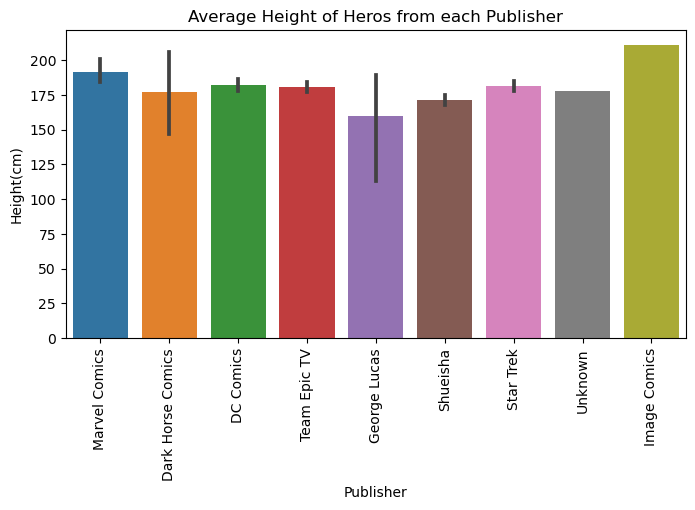

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=hts_pub, x='Publisher', y='Height(cm)', estimator=np.mean, ax=ax)
plt.xticks(rotation=90)
ax.set_title("Average Height of Heros from each Publisher")
plt.show()